In [89]:
# 한글 패키지 다운로드
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [23]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [55]:
data_folder = '/content/mnt/MyDrive/Data/서울시구별CCTV'
data = '/content/mnt/MyDrive/Data/인구소멸위기지역'
!ls -l $data_folder

total 8
-rw------- 1 root root 1793 Sep  7 05:23 '서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv'
-rw------- 1 root root 1872 Sep  7 07:39  서울시구별_CCTV.csv
-rw------- 1 root root 3179 Sep  7 05:25 '서울시주민등록인구(구별)통계.tsv'


In [50]:
pop = pd.read_csv(f'{data_folder}/서울시구별_CCTV.csv', encoding='utf-8')
pop.head()

,자치구,세대,CCTV수,인구(천명),인구별CCTV,세대(백),세대별CCTV
0,종로구,73525,1772,155.106,11.424445,735.25,2.410065
1,용산구,111650,2383,240.665,9.901731,1116.50,2.134348
2,성동구,134542,3602,295.767,12.178505,1345.42,2.677231
3,광진구,166957,2588,355.306,7.283862,1669.57,1.550100
4,동대문구,166372,2497,352.259,7.088534,1663.72,1.500854


#### ID 부여하기

In [51]:
name = [None] * len(pop)

for i in pop.index:
  if len(pop.자치구[i]) == 2:
    name[i] = '서울' + ' ' + pop.자치구[i]
  else:
    name[i] = '서울' + ' ' + pop.자치구[i][:-1]

In [52]:
pop['ID'] = name 
pop.head()

,자치구,세대,CCTV수,인구(천명),인구별CCTV,세대(백),세대별CCTV,ID
0,종로구,73525,1772,155.106,11.424445,735.25,2.410065,서울 종로
1,용산구,111650,2383,240.665,9.901731,1116.50,2.134348,서울 용산
2,성동구,134542,3602,295.767,12.178505,1345.42,2.677231,서울 성동
3,광진구,166957,2588,355.306,7.283862,1669.57,1.550100,서울 광진
4,동대문구,166372,2497,352.259,7.088534,1663.72,1.500854,서울 동대문


In [68]:
pop.set_index('자치구', inplace=True)
pop.head()

,세대,CCTV수,인구(천명),인구별CCTV,세대(백),세대별CCTV,ID
자치구,,,,,,,
종로구,73525,1772,155.106,11.424445,735.25,2.410065,서울 종로
용산구,111650,2383,240.665,9.901731,1116.50,2.134348,서울 용산
성동구,134542,3602,295.767,12.178505,1345.42,2.677231,서울 성동
광진구,166957,2588,355.306,7.283862,1669.57,1.550100,서울 광진
동대문구,166372,2497,352.259,7.088534,1663.72,1.500854,서울 동대문


### 시각화

* 그래프 시각화

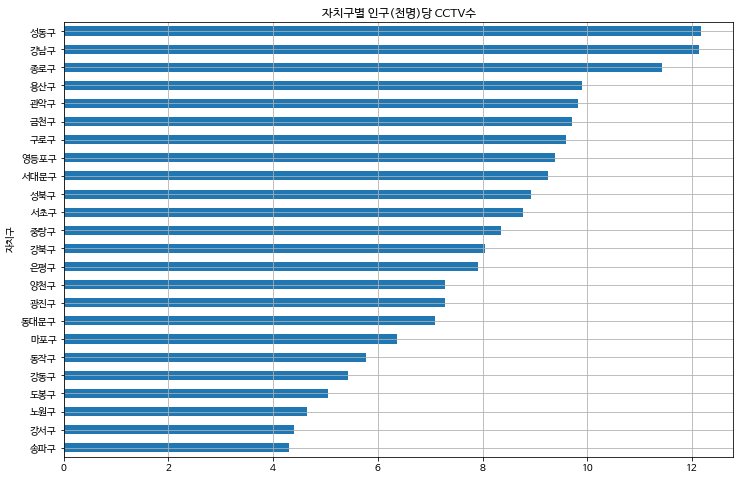

In [33]:
pop.인구별CCTV.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 인구(천명)당 CCTV수')
plt.show()

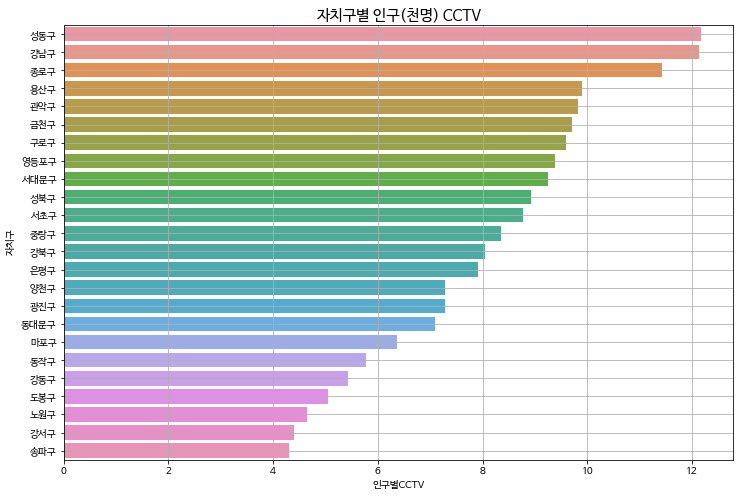

In [72]:
plt.figure(figsize=(12,8))
order = pop.인구별CCTV.sort_values(ascending=False).index
sns.barplot(x='인구별CCTV', y=pop.index, data=pop, order=order)
plt.grid()
plt.title('자치구별 인구(천명) CCTV', size=15)
plt.show()

### Folium 지도에 표기

In [80]:
import folium 
import json

In [76]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving seoul-gu-simple.json to seoul-gu-simple (1).json


In [82]:
geo_data = json.load(open(filename))

In [91]:
center = [37.581, 126.986]      # 서울 중심부 위도, 경도
map = folium.Map(location=center, zoom_start=10, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_data,
    data=pop.인구별CCTV,
    columns= (pop.index, pop.인구별CCTV),
    key_on='feature.id',
    fill_color='BuPu',
    legend_name='인구별 CCTV갯수'
).add_to(map)

title = '<h3 align="center" style="font-size:20px">서울시 자치구별 인구(천명)당 CCTV수</h3>'
map.get_root().html.add_child(folium.Element(title))
map